1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

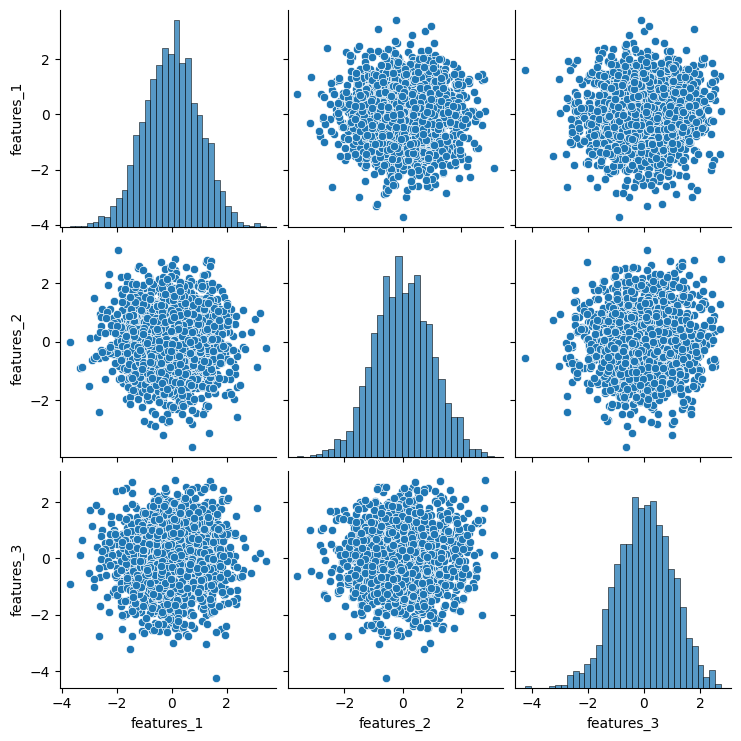

Correlation Matrix:
            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'regression_generated.csv'
df = pd.read_csv(file_path)
features = ['features_1', 'features_2', 'features_3']
sns.pairplot(df[features])
plt.show()
correlation_matrix = df[features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Values close to 1 indicate a strong positive correlation, close to -1 indicate a strong negative correlation,
# and values close to 0 indicate a weak correlation.Correlation between features_1 and features_2 ( -0.00522 )is negative.
#Correlations between features_1 and features_3 ( 0.02369 ) and features_2 and features_3 ( 0.04736 ) are positive.


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

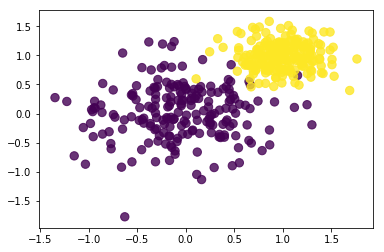

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

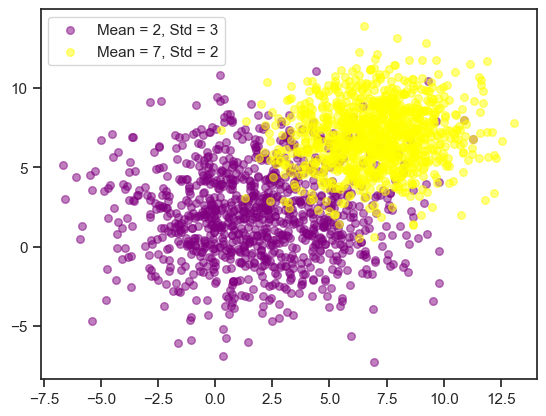

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(mean, std):
    n_category = 2    
    datasets = []
    for i in range(n_category):
        datasets.append(np.random.normal(mean, std, 1000))
    return datasets
mean_1 = 2
mean_2 = 7
std_1 = 3
std_2 = 2
dataset_1 = generate_dataset(mean_1, std_1)
dataset_2 = generate_dataset(mean_2, std_2)

import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(dataset_1[0], dataset_1[1], s=30, c='purple', label='Mean = 2, Std = 3', alpha=0.5)
plt.scatter(dataset_2[0], dataset_2[1], s=30, c='yellow', label='Mean = 7, Std = 2', alpha=0.5)
plt.legend(loc='upper left')
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

0.043403510522559086

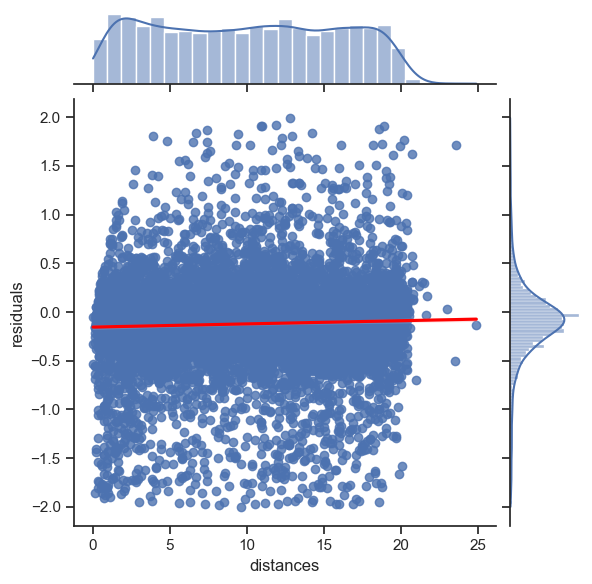

In [70]:
np_residuals = pd.read_pickle("residuals_261.pkl")
df_residuals = pd.DataFrame(np_residuals.item(), columns = ['residuals','distances'])
df_residuals_2 = df_residuals[np.abs(df_residuals['residuals']) < 2]
sns.jointplot(x="distances", y="residuals", data=df_residuals_2, kind="reg", joint_kws={'line_kws':{'color':'red'}})
np.corrcoef(df_residuals_2["distances"], df_residuals_2["residuals"])[0,1]
# These features are not corralated, because the linear relationship is almost zero.

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


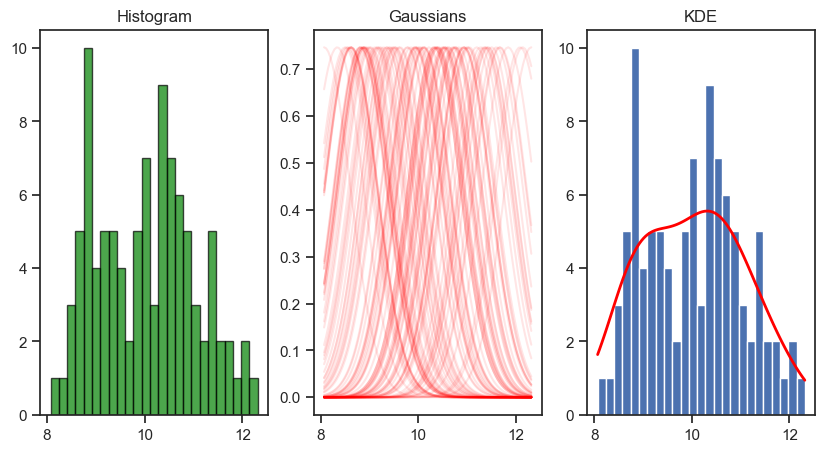

In [64]:
import scipy as sp

mean = 10
std = 1
size = 100
n_bins = int(size/4)

x = np.random.normal(mean, std, size)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))

bins = axes[0].hist(x, bins = n_bins ,alpha=0.7, label='Histogram', color='green', edgecolor='black')
axes[0].set_title('Histogram')


    
std_dev_factor = 1.06 * np.std(x) * np.power(len(x), -0.15)
x_grid = np.linspace(np.min(x), np.max(x), size)

gaussians = []
for sample in x:
    gaussian = sp.stats.norm.pdf(x_grid, sample, scale = std_dev_factor)
    gaussians.append(gaussian)
    axes[1].plot(x_grid, gaussian, color='red', alpha=0.1)    
axes[1].set_title('Gaussians')




sum_integral = np.sum(gaussians, axis = 0)
area_sum_integral = sp.integrate.trapz(np.sum(gaussians, axis = 0), x_grid)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sum_integral / area_hist
norm_sum_integral = sum_integral / k_norm



axes[2].set_title('KDE')
axes[2].plot(x_grid, norm_sum_integral, color='red', label='Sum of Gaussians', linewidth=2)
axes[2].hist(x, bins=n_bins)
axes[2].yaxis.tick_left()